# Incorrect Column Type Prediction

In [17]:
# Preamble to run notebook in context of source package.
# NBVAL_IGNORE_OUTPUT
import sys
sys.path.insert(0, '../')

In [18]:
from IPython.core.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults()
import numpy as np
import pandas as pd
# import pprint

from ptype.Column import Column2ARFF
from ptype.Ptype import Ptype
from ptype.utils import evaluate_types
from utils import *

## 1.a Incorrect Type Prediction

In [19]:
column2ARFF = Column2ARFF("../models/")

In [20]:
df = read_data(dataset_name="accident2016", header=0)

column = "Time (24hr)"
df_subsample = subsample_df(df, column_to_sample_from=column, sample_num=10)
df_subsample

,Time (24hr)
293,1615
475,1800
67,1157
133,715
350,1110
362,57
160,2104
117,1727
29,1708
402,1910


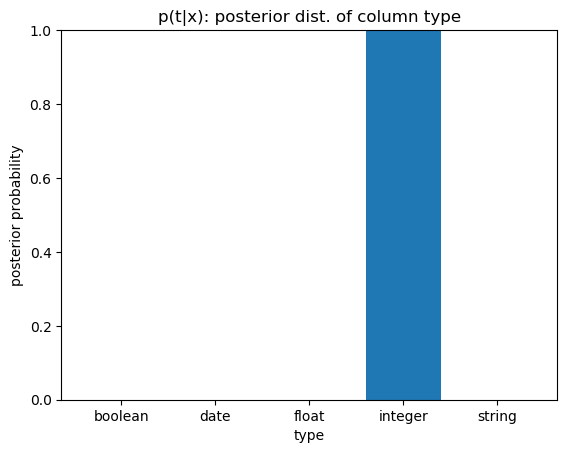

In [22]:
ptype = Ptype()
ptype.fit_schema(df_subsample)

plot_column_type_posterior(ptype.cols[column].p_t)

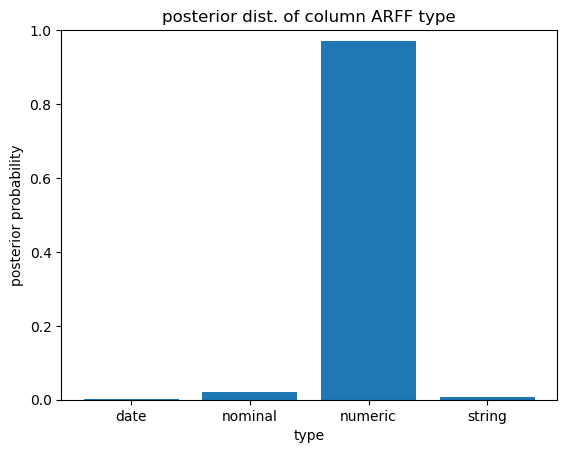

In [23]:
features = ptype.cols[column].features
arff_type, arff_post = column2ARFF.get_arff(features)

plot_arff_type_posterior(arff_post)

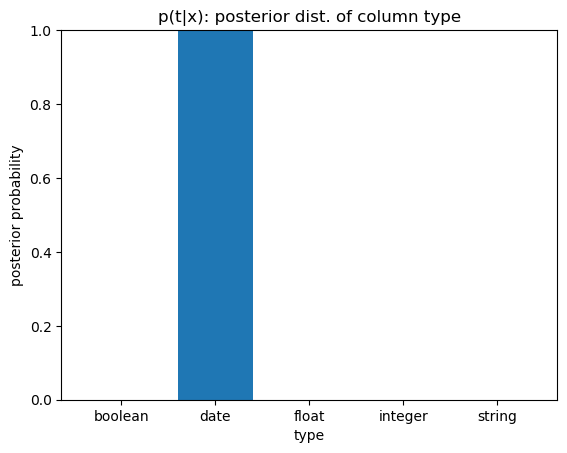

In [24]:
ptype.reclassify_column(column, 'date-iso-8601')

plot_column_type_posterior(ptype.cols[column].p_t)

# do the same thing for arff type

## 1.b Uniform posterior distribution

In [25]:
df = read_data(dataset_name='inspection_outcomes', header=0)

column = 'Provision type'
df_subsample = subsample_df(df, column_to_sample_from = column, sample_num = 10)
df_subsample

,Provision type
37,Children's home
140,Children's home
1090,Children's home
661,Children's home
53,Children's home
330,Children's home
1101,Children's home
1147,Children's home
1281,Children's home
906,Children's home


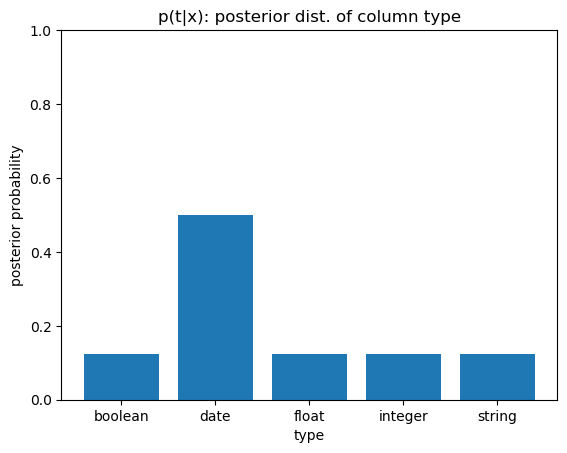

In [26]:
ptype.fit_schema(df_subsample)

plot_column_type_posterior(ptype.cols[column].p_t)

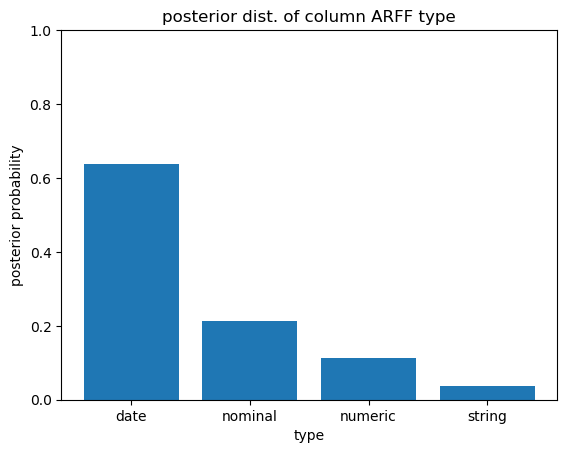

In [27]:
features = ptype.cols[column].features
arff_type, arff_post = column2ARFF.get_arff(features)

plot_arff_type_posterior(arff_post)

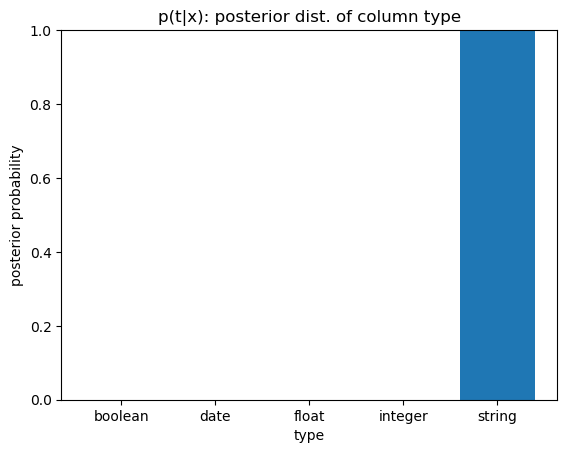

In [28]:
ptype.reclassify_column(column, 'string')

plot_column_type_posterior(ptype.cols[column].p_t)

# do the same thing for arff type
# add the character to the alphabet?